# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. 

In [1]:
import pandas as pd
icustayid = 23870.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_max_sepsis_" + str(icustayid) + "_final_1613327951.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,117.14840349104249,6628.4982481536235,0.32104340821050986,36.998511476961426,64.00110457840903,33.63648845949499,115.38461538461536,0.09550000000000014,92.85400609420547,0.9747722675244062,20.00000000000003,0.0,119.70298729626151,4.273863e+09
1,121.44393158382995,6991.000925227522,33.7835594187799,37.28823086096634,61.201810924434994,33.88395092926792,107.14285714285711,0.010000000000000009,93.22001367181534,0.974037800281707,20.134228187919494,10800.000000142898,122.98754848121615,4.273874e+09
2,109.53407575696194,7556.43751204041,1.8478810101265082,37.28777159648553,56.157518394457156,33.93006691007012,93.74999999999996,0.17499999999999982,93.65969413857877,0.9741651273229508,20.134228187919494,36000.00000010506,128.9546180243711,4.273899e+09
3,71.11034938018503,7737.404828907781,0.3355107901411532,37.286829791075206,53.38065569722522,33.94457648408006,88.23529411764703,-0.05,92.98162869166242,0.9741924143275768,20.134228187919494,46799.99999837629,130.9524534049177,4.273910e+09
4,99.93752975859053,8039.799990571174,29.096399142472055,37.28579065008398,51.363885379799484,33.958626536993634,83.3333333333333,-0.007,93.21189693976916,0.9742066543610174,20.134228187919494,68399.99999596066,133.82681702257582,4.273931e+09


In [4]:
len(simulation)

59

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

59

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
791,1.0,23870.0,4.273863e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,0.888060,204.999992,0.0,0.0,0.0,0.0,5754.0,2877.0,-5754.0,1.0
792,4.0,23870.0,4.273874e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,8631.0,2877.0,-8631.0,1.0
793,11.0,23870.0,4.273899e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.061947,81.249999,0.0,0.0,0.0,0.0,11508.0,2877.0,-11508.0,1.0
794,14.0,23870.0,4.273910e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,14385.0,2877.0,-14385.0,1.0
795,20.0,23870.0,4.273931e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,405.0,405.0,15612.0,1227.0,-15207.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

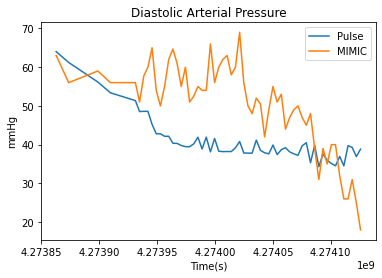

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

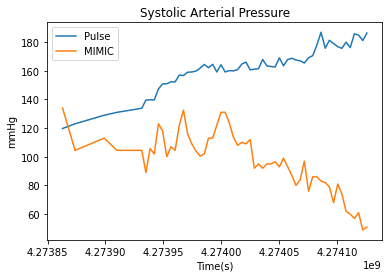

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

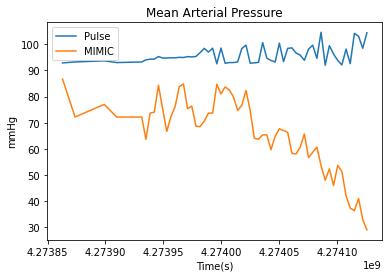

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

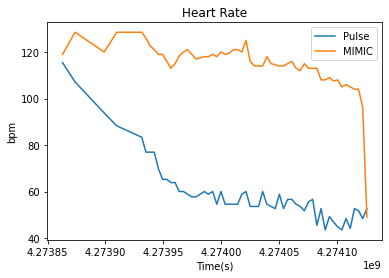

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

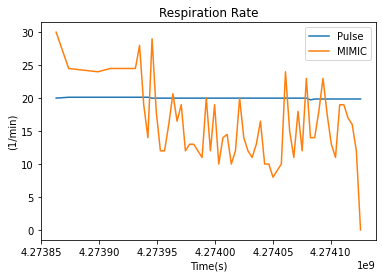

In [14]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

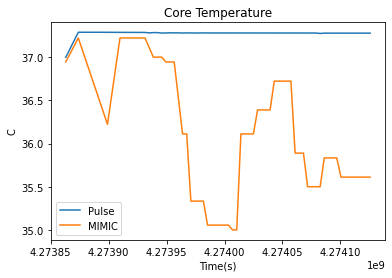

In [15]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()